# Bayesian sampling of ensembles

In [1]:
import os
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../../3_alphabetagamma/')

In [3]:
from MDRefine.MDRefine import load_data, normalize_observables, minimizer, unwrap_2dict

In [4]:
from basic_functions import run_Metropolis

In [22]:
def energy_fun(weights, if_Jeffreys):
    """ acting on single molecular system """
    
    # out = loss_function(np.zeros(2), data, regularization=None, alpha=1, fixed_lambdas=lambdas, if_save=True)
    
    # energy = out.loss_explicit
    energy = 0

    # quantity: population in the first frame/cluster over 4 total clusters
    quantity = np.sum(weights[:(len(weights)//4)])

    # av_g = unwrap_2dict(out.av_g)[0] 

    if if_Jeffreys:
        # Jef_prior = 1/np.sqrt(np.prod(weights))
        # energy = -np.log(Jef_prior)

        # more efficient?
        energy = 1/2*np.sum(np.log(weights))
    
    return energy, quantity

In [6]:
def proposal(weights, dx = 0.01):
    """ Based on the stick-breaking process """

    if not np.sum(weights) == 1: weights = weights/np.sum(weights)

    x = np.cumsum(weights)[:-1]
    
    x += dx*np.random.normal(size=len(x))
    x = np.mod(x, 1)
    x = np.concatenate((np.sort(x), [1]))

    weights_new = np.concatenate(([x[0]], np.ediff1d(x)))

    return weights_new

$ds^2 = \sum_i \frac{dw_i^2}{w_{0i}}$

is it invariant under coarse-graining? yes if the coarse-graining moves in the opposite direction by splitting frames into new frames with equal weights

In [7]:
w = np.array([1/8, 1/8, 1/4, 1/4, 1/8, 1/8])

w0 = np.array([1/4, 1/4, 1/8, 1/8, 1/8, 1/8])

compute_dist = lambda w, w0: np.sum((w-w0)**2)  # /w0)

d1 = compute_dist(w, w0)
print(d1)

# coarse-graining

new_w = []
new_w0 = []

for i in range(len(w)//2):
    new_w.append(w[2*i] + w[2*i + 1])
    new_w0.append(w0[2*i] + w0[2*i + 1])

new_w = np.array(new_w)
new_w0 = np.array(new_w0)

d1 = compute_dist(new_w, new_w0)
print(d1)



0.0625
0.125


In [8]:
proposal_full = {'fun': proposal, 'args': ([0.01/40])}

In [23]:
energy_fun_full = {'fun': energy_fun, 'args': ([False])}

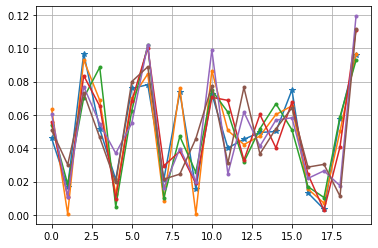

In [10]:
weights = np.random.uniform(0, 1, size=20)
weights = weights/np.sum(weights)

plt.plot(weights, '*-')

for i in range(5):

    new_weights = proposal(weights, dx=0.01)
    weights = new_weights

    plt.plot(new_weights, '.-')

plt.grid()

In [24]:
weights = np.random.uniform(0, 1, size=80)
weights = weights/np.sum(weights)

proposal_full = {'fun': proposal, 'args': ([0.01/4])}

out = run_Metropolis(weights, proposal=proposal_full, energy_function=energy_fun_full)

0


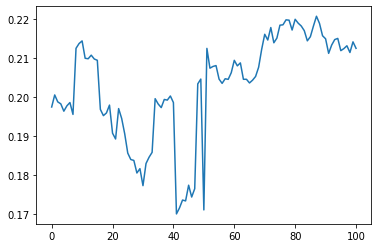

In [27]:
plt.plot(out[2])

In [15]:
weights.shape

(80,)

In [ ]:
# observable: average weight of the first frame over 20

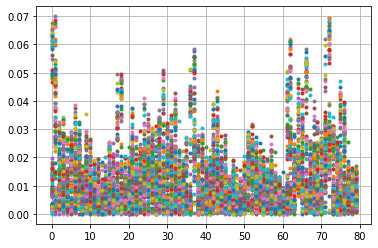

In [20]:
plt.plot(out[0].T, '.')
plt.grid()
plt.show()

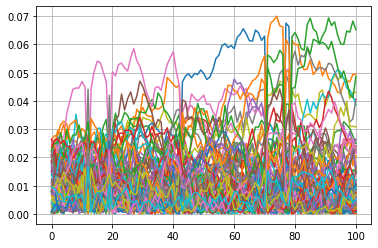

av. acceptance:  1.0


In [21]:
plt.plot(out[0])
# plt.plot(out[0][:, 1])
plt.grid()
plt.show()

print('av. acceptance: ', out[2])

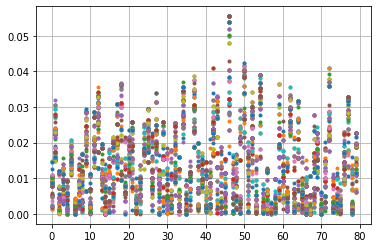

In [16]:
plt.plot(out[0].T, '.')
plt.grid()
plt.show()

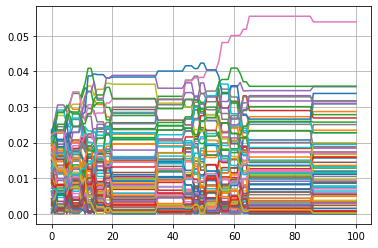

av. acceptance:  0.24


In [17]:
plt.plot(out[0])
# plt.plot(out[0][:, 1])
plt.grid()
plt.show()

print('av. acceptance: ', out[2])

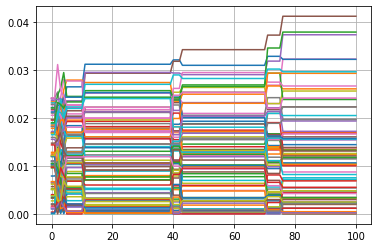

av. acceptance:  0.09


In [60]:
plt.plot(out[0])
# plt.plot(out[0][:, 1])
plt.grid()
plt.show()

print('av. acceptance: ', out[2])